In [1]:
from __future__ import division
import random,pickle,csv,cv2,os,scipy,pickle,warnings,matplotlib
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.stats import norm,skew
from itertools import islice

import keras.backend as K
from keras.callbacks import History
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D,GlobalMaxPooling2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.utils import print_summary
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.optimizers import Adam,SGD
from keras import applications
from keras.utils.vis_utils import plot_model

#print(os.listdir('../input/self driving car training data/data'))
warnings.filterwarnings('ignore')

2023-05-22 14:22:27.372259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 14:22:28.199679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/miniconda3/envs/fibered/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-22 14:22:28.199747: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-22 14:22:35.506807: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.

ImportError: cannot import name 'print_summary' from 'keras.utils' (/root/miniconda3/envs/fibered/lib/python3.9/site-packages/keras/utils/__init__.py)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from math import pi, ceil

import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Lambda
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import TruncatedNormal, Constant
from keras import regularizers
from keras import optimizers
import cv2

2023-05-05 14:31:22.857786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 14:31:23.504852: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 14:31:23.504906: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-05 14:31:25.821663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [12]:
# Image list (input)
steering_x = []

# Steering angle (output)
steering_y = []

# Defining the path to dataset 
#image_dir = '/kaggle/input/test-set-self-driving-cars/driving_dataset/'
image_dir = 'self_driving/'

In [13]:
# Reading the text file which contain image name and its corresponding steering angle

with open("data.txt") as file:
    for lines in file:
        X, y = lines.split()
        steering_x.append(image_dir + X) # appending the image_dir along with its name to list
        steering_y.append((float(y) * pi) / 180) # appending the sttering angle after conversion to output list

In [14]:
# Printing the length of input and the output list
print(len(steering_x))
print(len(steering_y))

45406
45406


In [15]:
# printing few input and output from the list 

print("***** Image names ***** \n", steering_x[:10])
print("***** Steering angle ***** \n", steering_y[:10])

***** Image names ***** 
 ['self_driving/0.jpg', 'self_driving/1.jpg', 'self_driving/2.jpg', 'self_driving/3.jpg', 'self_driving/4.jpg', 'self_driving/5.jpg', 'self_driving/6.jpg', 'self_driving/7.jpg', 'self_driving/8.jpg', 'self_driving/9.jpg']
***** Steering angle ***** 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
steering_y[500:520]

[-1.7318902167539734,
 -1.740616863013945,
 -1.740616863013945,
 -1.7283995582499845,
 -1.7090264035528475,
 -1.668534764906579,
 -1.6456709517054533,
 -1.6385151017722765,
 -1.6385151017722765,
 -1.6509069394614364,
 -1.6631242442253968,
 -1.6702800941585736,
 -1.6720254234105676,
 -1.6702800941585736,
 -1.6702800941585736,
 -1.6702800941585736,
 -1.6720254234105676,
 -1.6807520696705391,
 -1.6966345658636877,
 -1.7142623913088304]

In [ ]:
# First 80% as train data
train_steering_x = steering_x[:int(len(steering_x) * 0.8)]
train_steering_y = steering_y[:int(len(steering_y) * 0.8)]

# Remaining 20% as test data
val_steering_x = steering_x[-int(len(steering_x) * 0.2):]
val_steering_y = steering_y[-int(len(steering_y) * 0.2):]

In [ ]:
plt.hist(train_steering_y, bins=40, density=1, color='green', histtype ='step')
plt.hist(val_steering_y, bins=40, density=1, color='blue', histtype ='step')

plt.show()

In [ ]:
train_mean_steering_y = np.mean(train_steering_y)
print('Test_Mean_Squared_Error(MEAN):%f' % np.mean(np.square(val_steering_y-train_mean_steering_y)) )

In [ ]:
print('Test_Mean_Squared_Error(ZERO):%f' % np.mean(np.square(np.array(val_steering_y)-0.0)) )

In [ ]:
print("Number of train images =", len(train_steering_x), "\nNumber of validation images =", len(val_steering_x))

In [ ]:
# dimensions of our images.
img_width, img_height = 66, 200
input_shape = (img_width, img_height, 3)

In [ ]:
train_data_dir = "self_driving/"
nb_train_samples = 36324
nb_validation_samples = 9081
epochs = 12
batch_size = 128

In [ ]:
def atan_layer(x):
    return tf.multiply(tf.atan(x), 2)

In [ ]:
# Model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(24, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 2
model.add(Conv2D(36, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 3
model.add(Conv2D(48, (5, 5), strides=2, input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(64, (3, 3), input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(64, (3, 3), input_shape=input_shape,
          kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
          bias_initializer=Constant(value=0.1),
          kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Fully Conected Layer 1
model.add(Dense(1164,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully Conected Layer 2
model.add(Dense(100,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully Conected Layer 3
model.add(Dense(50,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1,
         kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.1),
         bias_initializer=Constant(value=0.1),
         kernel_regularizer=regularizers.l2(0.001)))
model.add(Lambda(atan_layer))

In [ ]:
model.summary()

In [ ]:
adam = optimizers.Adam(lr = 0.0001)
model.compile(loss='mse',
              optimizer=adam,
              metrics=['mse'])

In [ ]:
def generate_arrays_from_file():
    gen_state = 0
    while 1:
        if gen_state + 128 > len(train_steering_x):
            gen_state = 0
        paths = train_steering_x[gen_state : gen_state + 128]
        y = train_steering_y[gen_state : gen_state + 128]
        X =  [np.float32(cv2.resize(cv2.imread(x, 1), (200, 66) )) / 255.0 for x in paths]
        gen_state = gen_state + 128
        yield np.array(X), np.array(y)

In [ ]:
def get_validation_dataset():
    images= [np.float32(cv2.resize(cv2.imread(x, 1), (200, 66))) / 255.0 for x in val_steering_x]
    return np.array(images), np.array(val_steering_y)

In [ ]:
train_generator = generate_arrays_from_file()

In [ ]:
X, y = get_validation_dataset()

In [ ]:
X.shape

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True, 
                               save_weights_only=False, 
                               mode='auto', 
                               period=1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=(X,y),
    callbacks=[checkpointer,reduce_lr]
)

In [ ]:
model.save_weights("weights.h5")

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize = (8, 8))
epochs = range(1, len(mse) + 1)
plt.plot(epochs, mse, 'bo', label='Training MSE')
plt.plot(epochs, val_mse, 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [1]:
from IPython.display import Image as Image1
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from PIL import Image
from numpy import asarray
import math

import numpy as np
import os



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img


In [2]:
img_path = "self_driving/10.jpg"

In [4]:
A = num_array(img_path)

In [5]:
A.shape

(256, 455, 3)

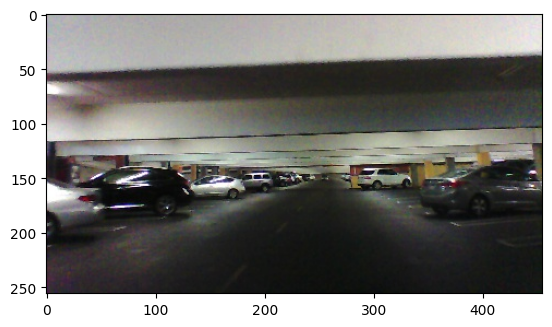

In [7]:
A = 1/255*A
plt.imshow(A)

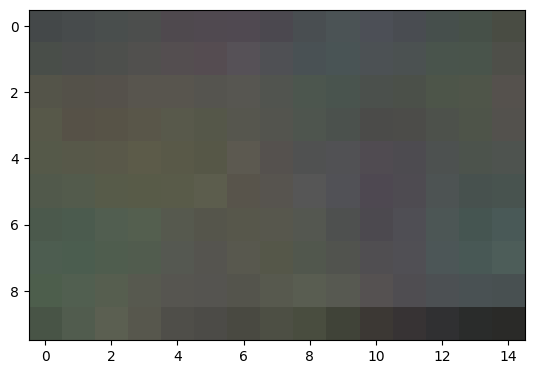

In [10]:
plt.imshow(A[100:110, 250:265])